## Mushrooms Data Analysis
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).
Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.

### Importing the libraries

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
df=pd.read_csv('mushroom.csv')

In [6]:
df=pd.DataFrame(data=df)

#### Checking the first 5 rows and last 5 rows data

In [134]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,0,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,0,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,0,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,0,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,0,1,0,3,0,1


In [14]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Here is the total info about the dataset

In [10]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Here all dtypes are object in the dataset

In [11]:
df.shape

(8124, 23)

Here we have 8124 rows and 23 columns in the dataset

In [13]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null values present in the dataset

In [76]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,1,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,p,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,8124,7488,3968,2388,4040,3148


### Replacing the Unwanted values

In [80]:
df['stalk-root'].replace('?', np.nan, inplace=True)
print('Value counts for stalk root before filling missing values:', df['stalk-root'].value_counts(), sep='\n')
print( '\nNumber of null values: ', df['stalk-root'].isnull().sum())
df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)
print( 'Value counts for stalk root after filling missing values with mode:', df['stalk-root'].value_counts(), sep='\n')

Value counts for stalk root before filling missing values:
b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Number of null values:  2480
Value counts for stalk root after filling missing values with mode:
b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


### EDA and Data Visualization

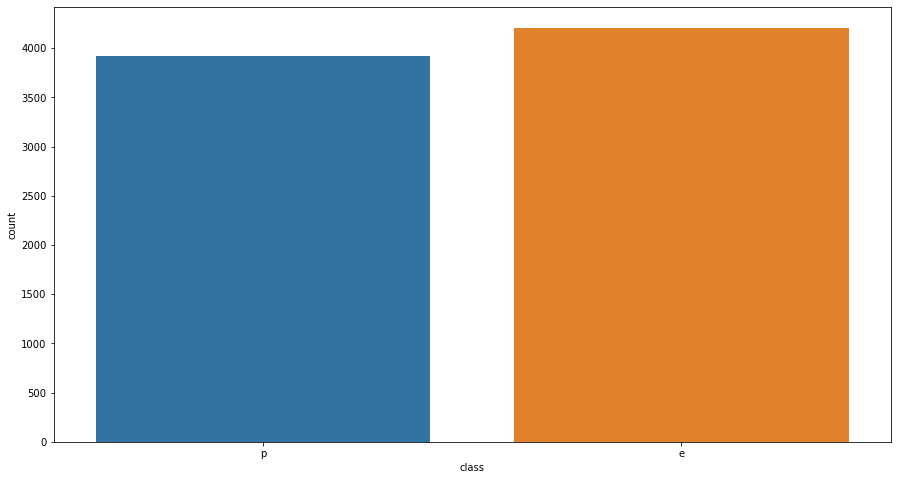

In [59]:
#Lets check the count of each type of mushroom graphically
fig = plt.figure(figsize=(15,8))
sns.countplot(x="class",data=df)
plt.show()


### Cap-shape

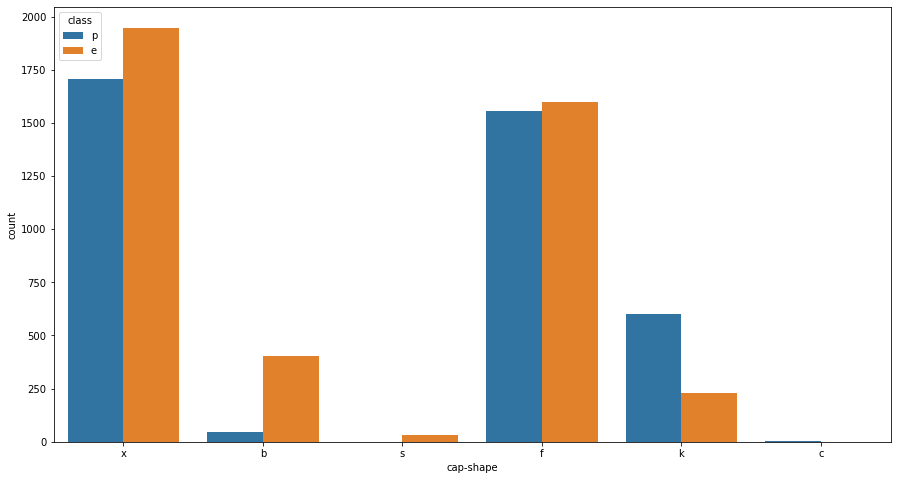

In [60]:
#Lets chcek whether the count basis of cap shape
fig = plt.figure(figsize=(15,8))
sns.countplot(x="cap-shape",hue="class",data=df)
plt.show()


 with cap-shaped as x and f both have alsmost equal count of poisonous and not edible mushrooms
with cap shaped as k poisonous are more

### cap-surface

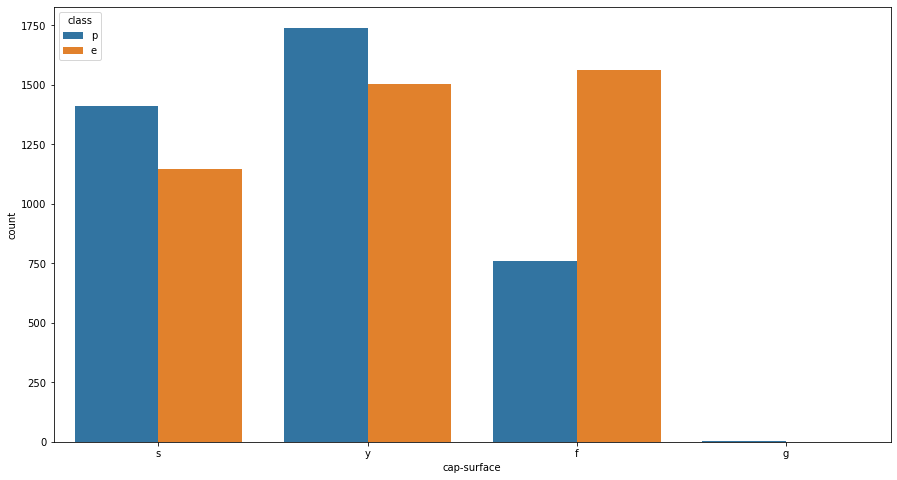

In [63]:
#Lets chcek whether the count basis of cap surface
fig = plt.figure(figsize=(15,8))
sns.countplot(x="cap-surface",hue="class",data=df)
plt.show()

Here we come to know that mushrooms without bruises are in very high number poisonous
we can say almost all the mushrooms without bruises are poisonous if we leave 500 instances

### odor

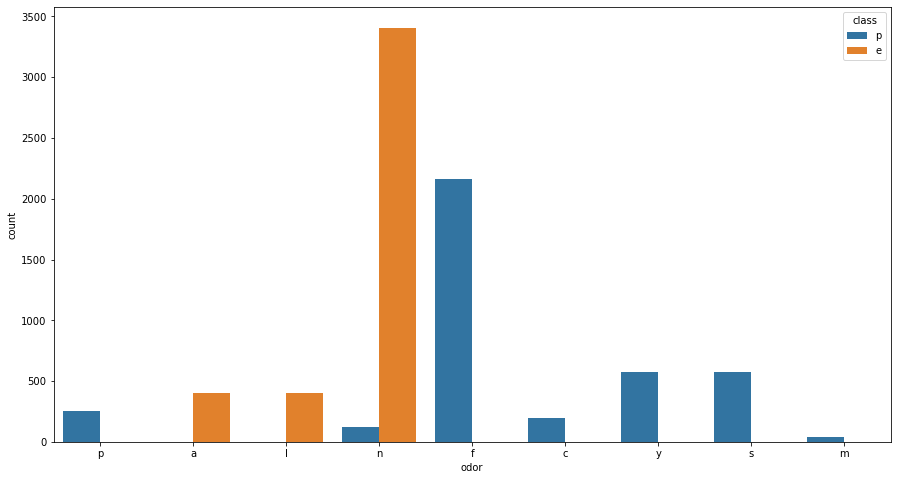

In [64]:
#lets chcek the count on the basis of "odor"
fig = plt.figure(figsize=(15,8))
sns.countplot(x="odor",hue="class",data=df)
plt.show()

Here we come to know that edible mushrooms are basically has odor almond ,anise and no smell
maximum number of edible mushrooms have no smell
maximum number of poisonous mushrooms have foul smell

### Gill-attachment

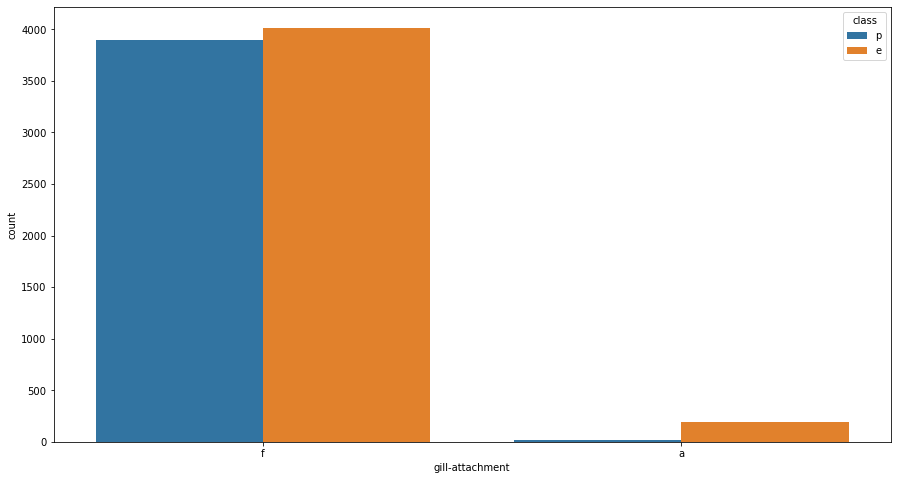

In [65]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="gill-attachment",hue="class",data=df)
plt.show()

'Free gill attachments are almost half edible or poisonous.'

### Gill Spacing

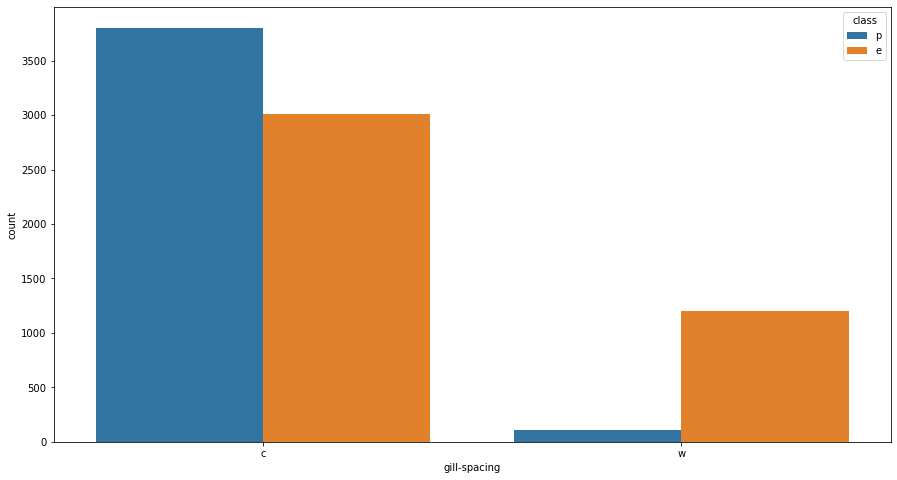

In [66]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="gill-spacing",hue="class",data=df)
plt.show()

Crowded gill spacing  more edible than the close gill spacing

## Gill Size

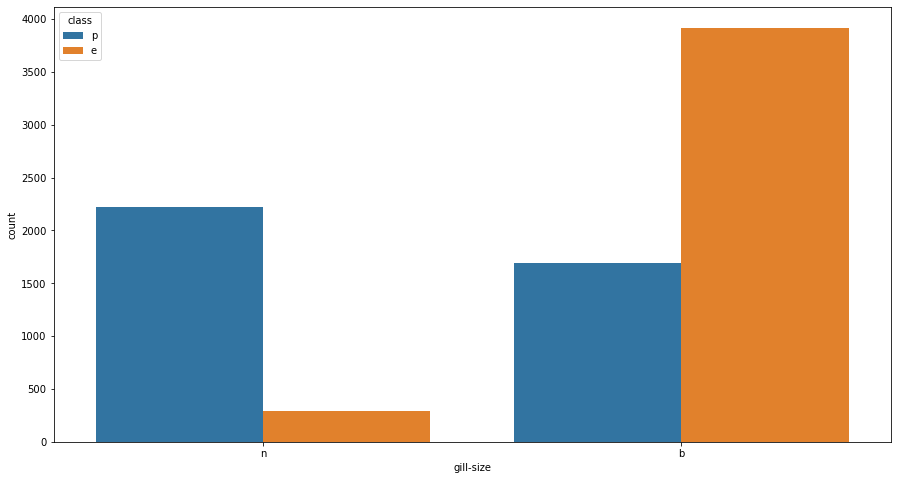

In [67]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="gill-size",hue="class",data=df)
plt.show()

Distribution of Mushroom by Gill Spacing and Class shows 'Narrow gill size looks more poisonous than the broad gill size

## Gill Color

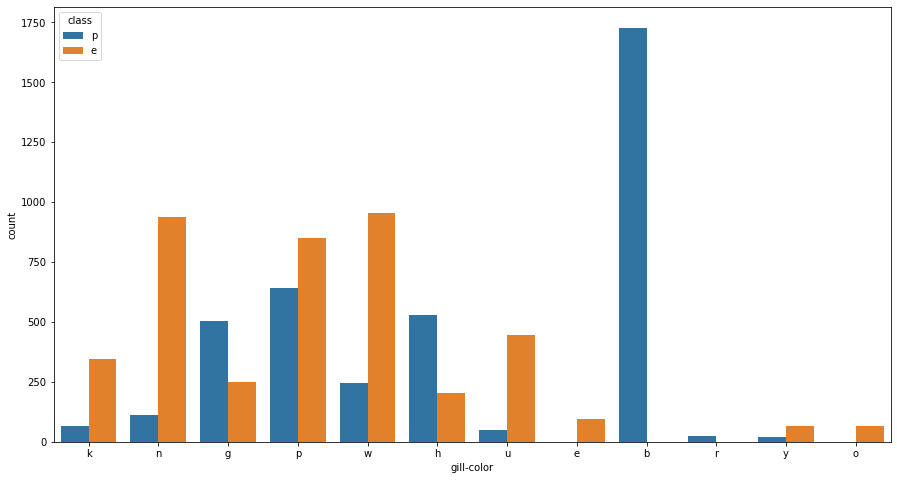

In [68]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="gill-color",hue="class",data=df)
plt.show()

from here we can conclude all mushrooms with gill color buff are poisonous and they are very high number
So we should restrict ourselves before eating mushrooms havng gill color buff


## Stalk Shape

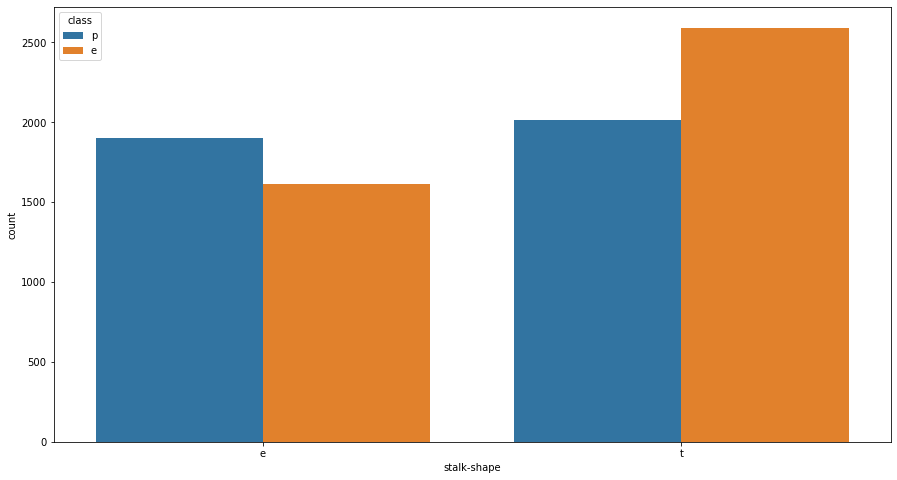

In [69]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="stalk-shape",hue="class",data=df)
plt.show()

Distribution of Mushroom by Stalk Shape and Class here stalk shape of Tapering are more edible than stalk shape of Enlarging

## Veil-color

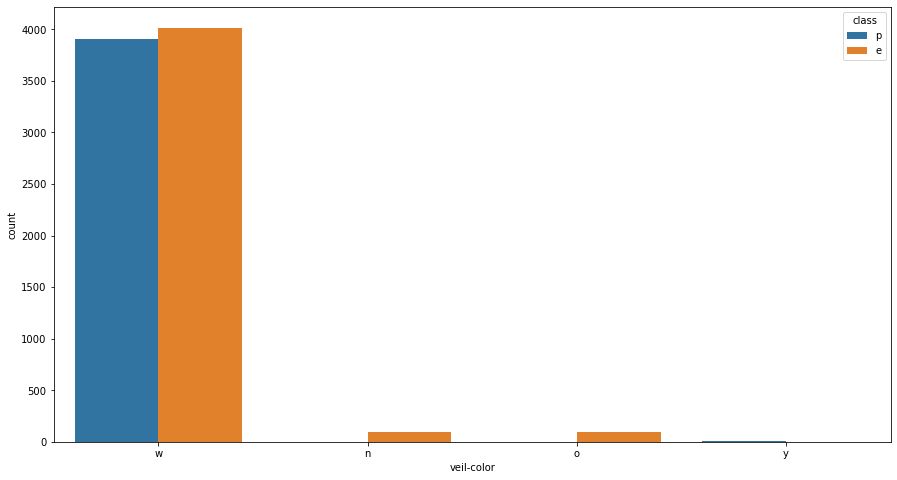

In [71]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="veil-color",hue="class",data=df)
plt.show()

we cant conclude any thing from here as maximum of both types are from veil color white
we can drop this column also as it has very less variance

In [72]:
#lets drop the column veil-color as concluded from above
df.drop(columns=["veil-color"],inplace=True)

## Veil-type

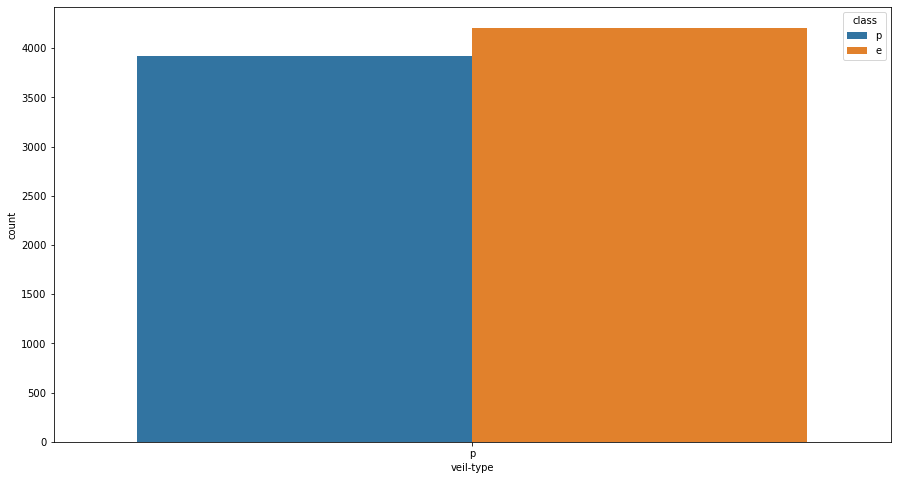

In [74]:
#lets chcek the count on basis of veil-type
fig = plt.figure(figsize=(15,8))
sns.countplot(x="veil-type",hue="class",data=df)
plt.show()


so we can say veil type aslo does not provide any clear distinction on its own

## Stalk Surface Below Ring

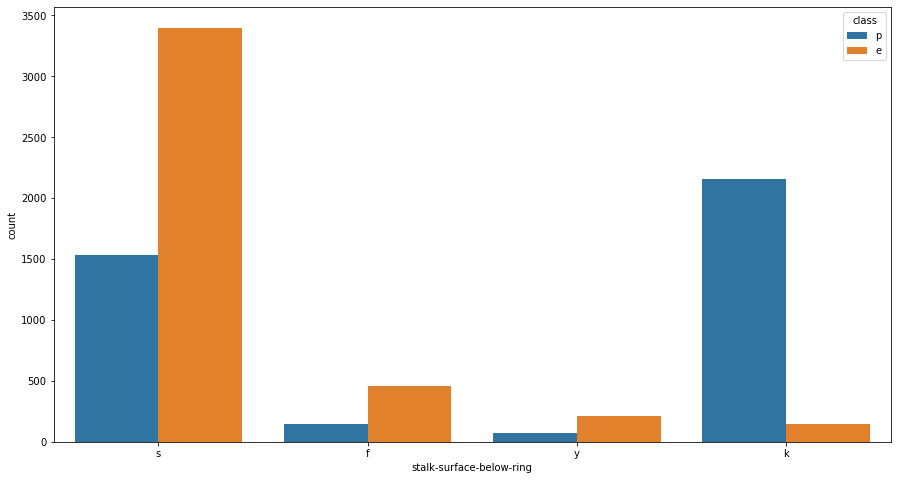

In [81]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="stalk-surface-below-ring",hue="class",data=df)
plt.show()

Stalk Surface with silky looks more poisonous  than than other types of Stalk Surface

## Stalk Color Above Ring

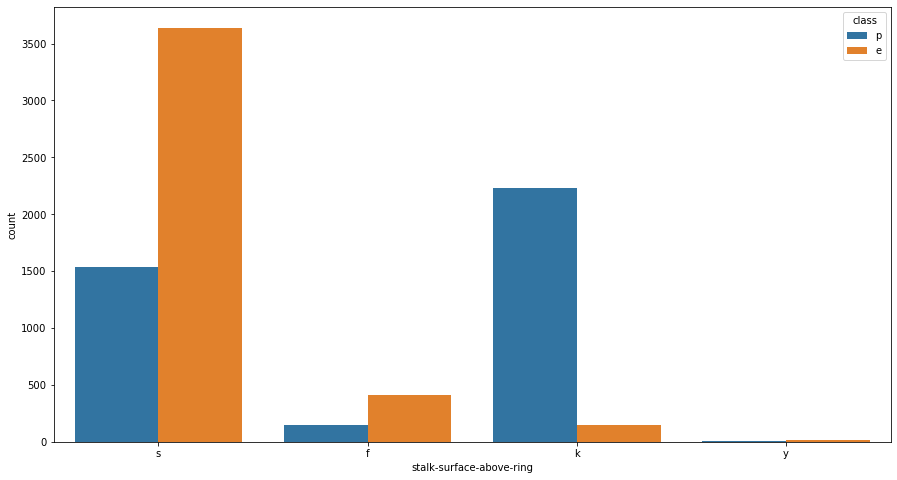

In [82]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="stalk-surface-above-ring",hue="class",data=df)
plt.show()

Stalk Surface with silky looks more poisonous  than than other types of Stalk Surface

## Stalk Color Above Ring

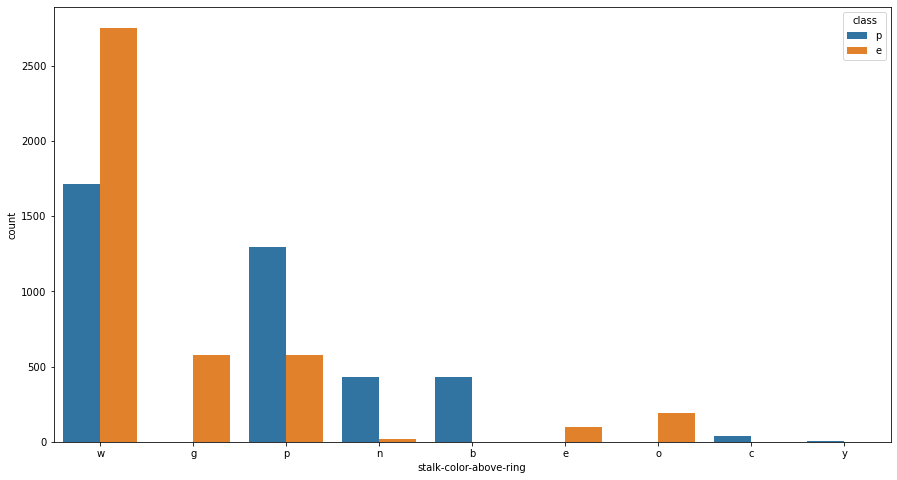

In [83]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="stalk-color-above-ring",hue="class",data=df)
plt.show()

Stalk Color Above Ring with pink,brown and buff seems more poisonous.

## Stalk Color Below Ring

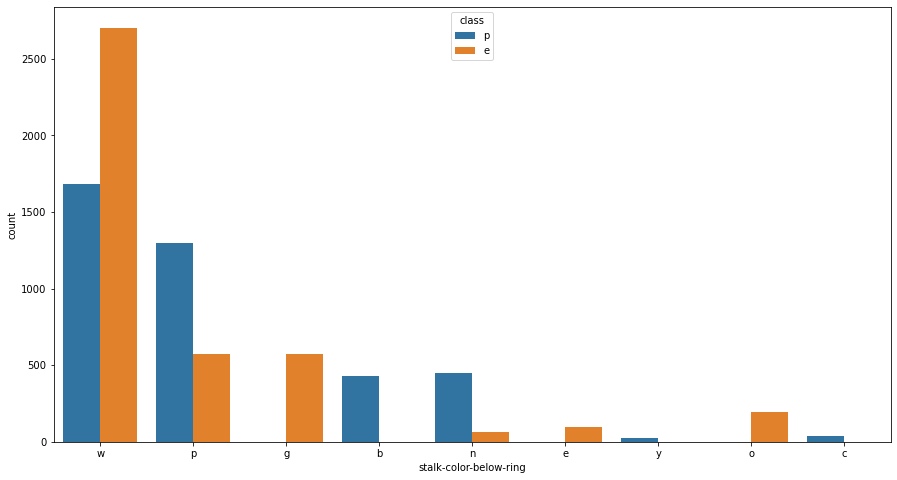

In [84]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="stalk-color-below-ring",hue="class",data=df)
plt.show()

Same as Above Ring, Stalk Color Below Ring with pink,brown and buff seems more poisonous.

## Ring Number

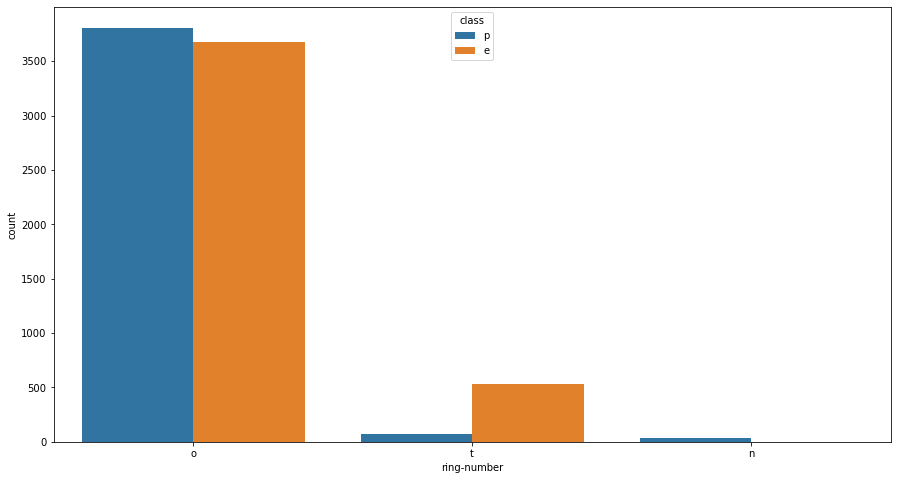

In [85]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="ring-number",hue="class",data=df)
plt.show()

Distribution of Mushroom by Ring Number ,here One ring mushroom are very and most of them poisonous

## Ring Type

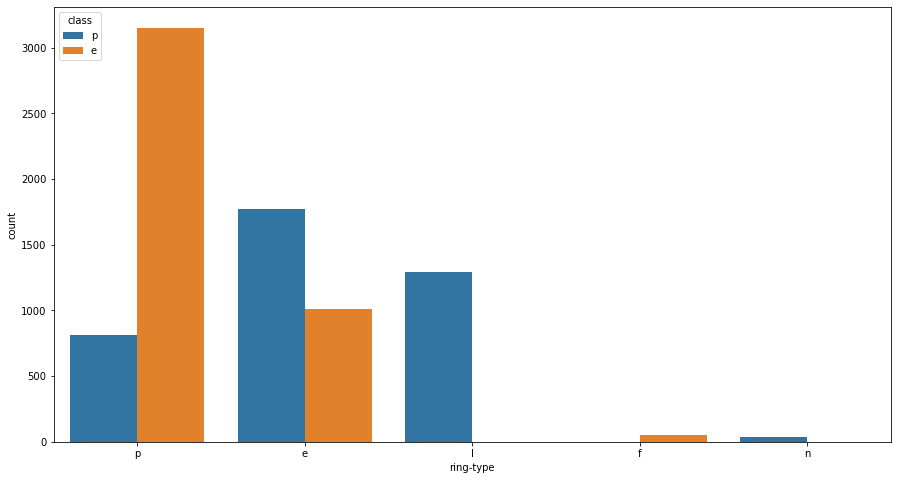

In [86]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="ring-type",hue="class",data=df)
plt.show()

Distribution of Mushroom by Ring Type and Class ,here Large Ring Type in mushrooms seems dangerous.

## Population

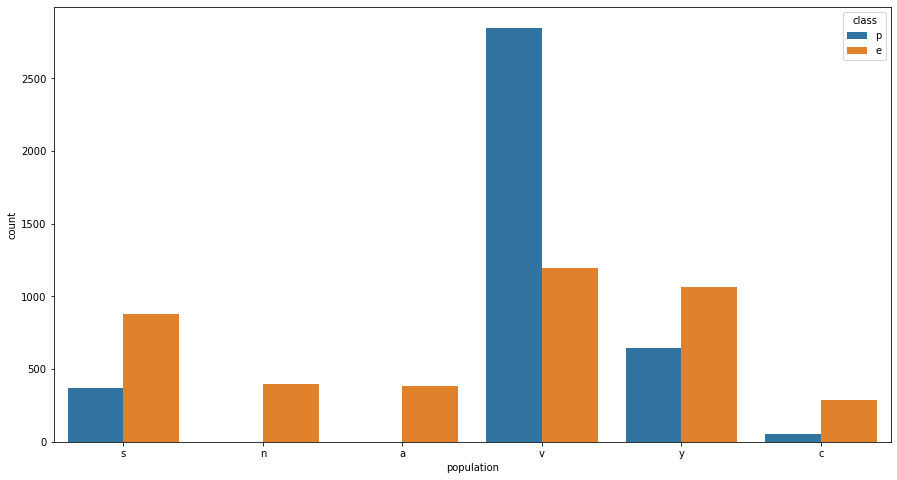

In [75]:
#lets check the counts on the basis of population
fig = plt.figure(figsize=(15,8))
sns.countplot(x="population",hue="class",data=df)
plt.show()

The popluation of several mushrooms is more of poisonous.

## Habitat

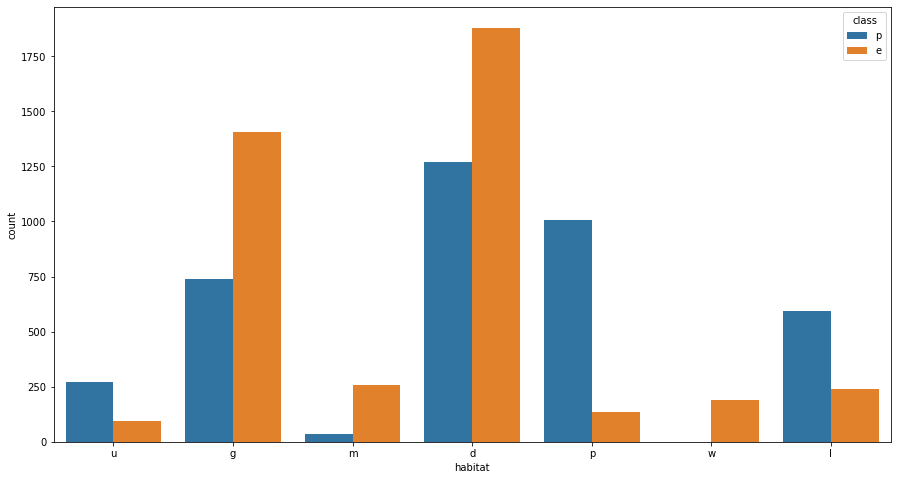

In [87]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="habitat",hue="class",data=df)
plt.show()

Distribution of Mushroom by Habitat and Class, here the woods habitat mushrooms are very present and most of them are edible 

## Preprocessing

### Label Encoder

Most of the sklearn functions expect that the data with number labels rather than word labels. Hence, we need to convert such labels into number labels. This process is called label encoding.

In [99]:
le = LabelEncoder()
for col in list(df.columns):
    df[col] = le.fit_transform(df[col])

### Dataset after label encoder

In [105]:

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,0,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,0,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,0,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,0,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,0,1,0,3,0,1


In [102]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [103]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Splitting the data

In [121]:
x = df.drop('class', axis=1)
y = df[['class']]
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,0,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,0,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,0,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,0,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,0,1,0,3,0,1


In [122]:
x.shape

(8124, 21)

In [114]:
y.shape

(8124, 1)

Performing Train_test_split method

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y , shuffle =True,test_size=0.25,random_state=42)

## Models

In [124]:
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ada = AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier()
dtc= DecisionTreeClassifier()

In [125]:
model = [lg,gnb,sv,rf,ada,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is:")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    
    score=cross_val_score(m,x,y,cv=5)
    print(" The score after cross_validation : ",score)
    print()
    print(" The Mean score after cross_validation : ",score.mean())
    print('\n')

Accuracy score of  LogisticRegression() is:
0.9502708025603152
[[987  53]
 [ 48 943]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

 The score after cross_validation :  [0.704      0.98523077 0.87569231 0.99815385 0.77832512]

 The Mean score after cross_validation :  0.8682804092459264


Accuracy score of  GaussianNB() is:
0.9015263417035942
[[996  44]
 [156 835]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1040
           1       0.95      0.84      0.89       991

    accuracy                           0.90      2031
   macro avg       0.91      0.90      0.90      2031
weighted avg       0.91      0.90      0.90      2031

 The score after cross_v

Minimum difference in Accuracy score and cross validation score is for DecisionTreeClassifier , so this is our best model

##  HYPER PARAMETER TUNING

In [126]:
from sklearn.model_selection import GridSearchCV


In [127]:
#DecisionTreeClassifier

parameters ={'criterion': ['gini','entropy'],
             'max_depth':[4,5,6,7,8],
             'splitter':['best','random']}

In [128]:
grid= GridSearchCV(dtc,parameters,cv=5)

In [129]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [130]:
#Printing the best parameter found by DecisionTree
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}

In [131]:
mod=DecisionTreeClassifier(criterion='gini',max_depth=7,splitter='best')
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

100.0


## Saving the model

In [132]:
#saving the model
model=joblib.dump(mod,'dtcmodel.obj')

In [133]:
print("U+1F617")

U+1F617
